<a href="https://colab.research.google.com/github/BAHAMLAOUHI/Data-Mining-Project/blob/main/CAH_%26_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


we imported the balanced version for more visuals and less memory usage

In [2]:
df=pd.read_csv('onlinefraud_balanced.csv')
df.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.445416,-0.100287,-0.264684,0.504468,0,0,1,0,0,0
1,-1.660891,0.433257,-0.135870,-0.323814,1,0,0,0,0,1
2,-0.740502,0.204678,-0.183655,-0.323814,1,0,1,0,0,0
3,0.130706,-0.249575,-0.288714,3.993899,0,0,1,0,0,0
4,0.987862,0.229451,-0.288714,0.597735,0,0,0,0,0,1


In [3]:
X=df.drop(['isFraud'],axis=1)
y=df['isFraud']

for more clear presentation i will only take 50 fraud and 50 non fraud transactions

In [3]:
# Get all fraud cases (where isFraud == 1)
fraud_cases = df[df['isFraud'] == 1]
fraud_cases=fraud_cases.sample(n=100, random_state=42)


# Get non-fraud cases (where isFraud == 0) with the same size as fraud cases
non_fraud_cases = df[df['isFraud'] == 0].sample(n=len(fraud_cases), random_state=42)

# Combine the two subsets to form a balanced dataset
min_df = pd.concat([fraud_cases, non_fraud_cases])

# Shuffle the data to avoid any order bias
min_df = min_df.sample(frac=1, random_state=17).reset_index(drop=True)
min_df.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,2.526528,6.491566,1.130639,-0.323814,1,0,1,0,0,0
1,-1.590633,-0.267460,-0.256220,-0.323814,0,0,0,0,1,0
2,0.896526,-0.235254,-0.288714,-0.296864,0,0,1,0,0,0
3,-0.066019,0.351596,-0.282571,-0.271847,0,0,0,0,0,1
4,0.896526,-0.266492,-0.261266,-0.323814,0,0,0,0,1,0


In [4]:
min_df.shape

(200, 10)

In [5]:
Xmin=min_df.drop(['isFraud'],axis=1)
ymin=min_df['isFraud']

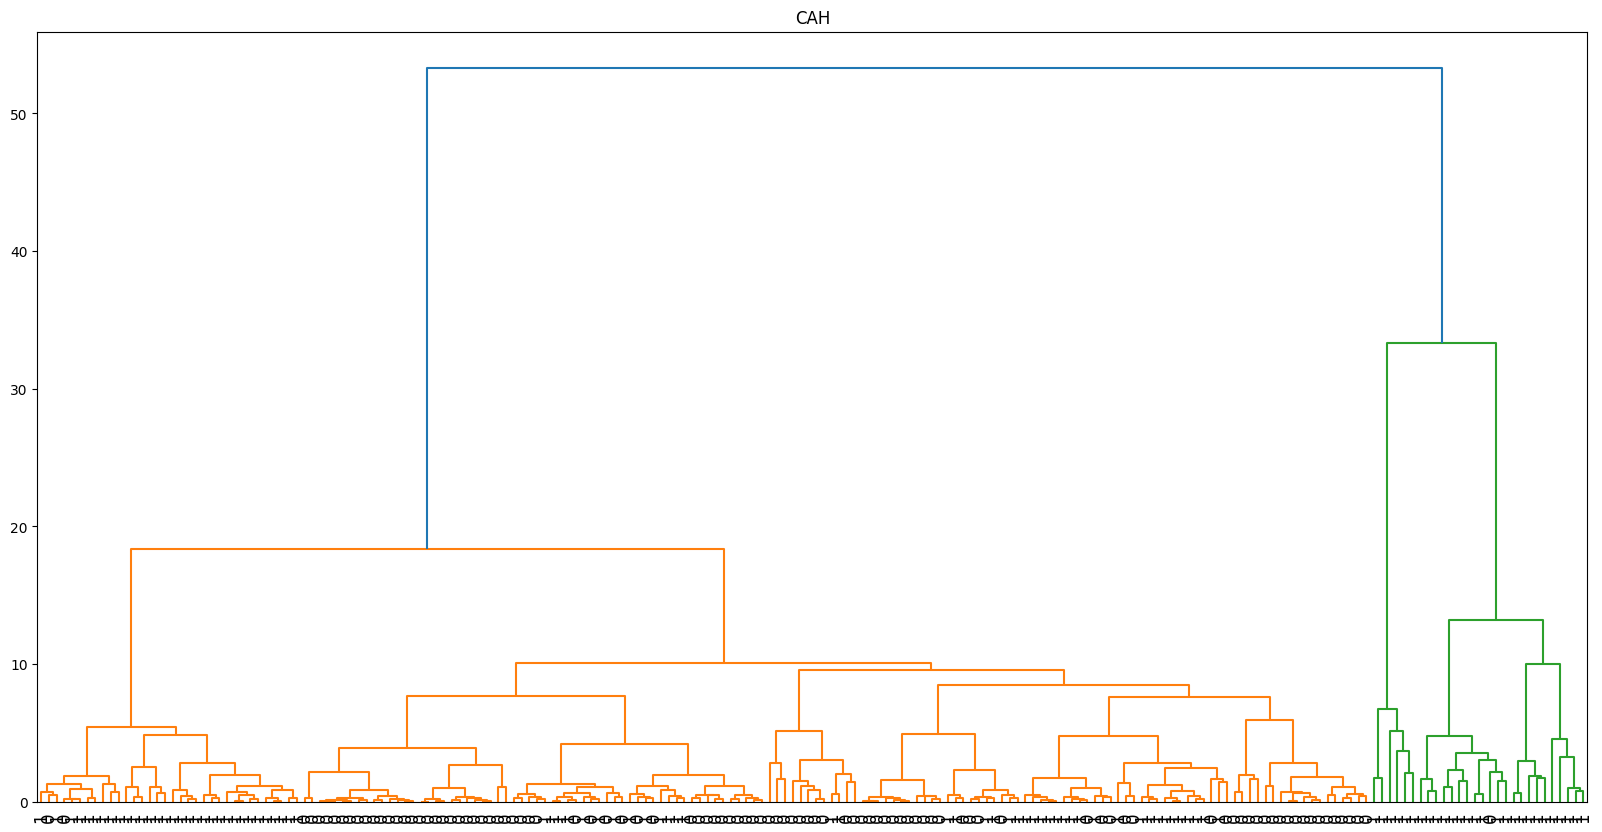

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 10))
plt.title("CAH")
dendrogram = dendrogram(linkage(Xmin, method='ward'), labels =ymin.values, leaf_font_size=12)
plt.show()


In [35]:
# plt.figure(figsize=(20, 10))
# plt.title('CAH avec matérialisation des 4 classes')
# Z=linkage(Xmin, method='ward', metric='euclidean')
# dendrogram(Z, labels =ymin.values, leaf_font_size=12, orientation='top', color_threshold=15)
# plt.axhline(y=15, color='r', linestyle='--')

# plt.show()

We could see here that oranges sample is basically a group of fraud also both red and perple , and the green is for the non fraud transactions( it contain some outliers but mainly non fraud )


In [16]:
#Découpage à la hauteur t=15 ==> identification de 4 groupes obtenus
from scipy.cluster.hierarchy import fcluster
groupes_cah = fcluster(linkage(Xmin, method='ward'), t=15, criterion='distance')
groupes_cah

min_df['groupes_cah'] = groupes_cah



In [17]:
min_df.head()


,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,groupes_cah
0,2.526528,6.491566,1.130639,-0.323814,1,0,1,0,0,0,4
1,-1.590633,-0.267460,-0.256220,-0.323814,0,0,0,0,1,0,2
2,0.896526,-0.235254,-0.288714,-0.296864,0,0,1,0,0,0,2
3,-0.066019,0.351596,-0.282571,-0.271847,0,0,0,0,0,1,2
4,0.896526,-0.266492,-0.261266,-0.323814,0,0,0,0,1,0,2


In [18]:
min_df.groupes_cah.value_counts()

,count
groupes_cah,
2,138
1,34
4,22
3,6


In [19]:
# Group the dataframe by 'groupes_cah' and then count the number of 'isFraud' values for each group
label_counts = min_df.groupby('groupes_cah')['isFraud'].value_counts()

label_counts

groupes_cah  isFraud
1            1          32
             0           2
2            0          97
             1          41
3            1           6
4            1          21
             0           1
Name: count, dtype: int64

# We try it now on the balanced data

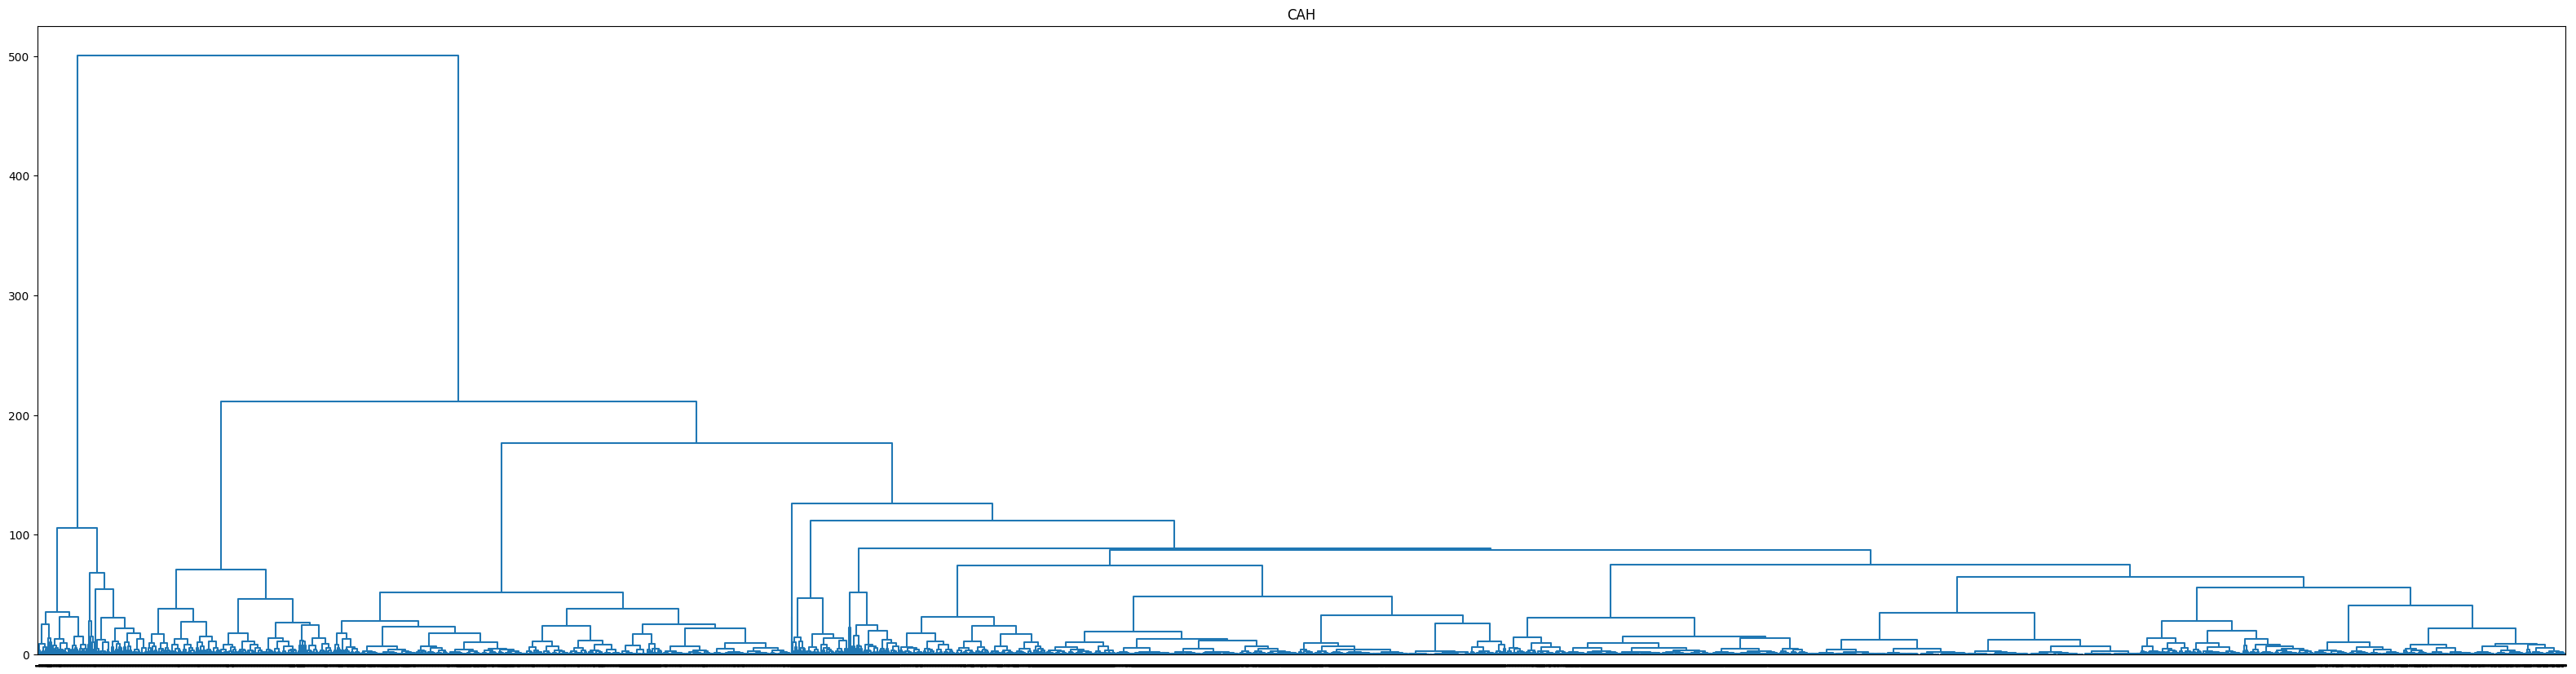

In [74]:


# générer la matrice des liens
Z = linkage(X,method='ward', metric='euclidean')

Z.shape
#affichage du dendogramme
plt.figure(figsize=(40, 10))
plt.title("CAH")
dendrogram(Z, color_threshold=0,labels=y.values)
plt.show()

In [79]:
from scipy.cluster.hierarchy import fcluster
groupes_cah_df = fcluster(linkage(X, method='ward'), t=70, criterion='distance')
groupes_cah_df

df['groupes_cah'] = groupes_cah_df

In [80]:
# Group the dataframe by 'groupes_cah' and then count the number of 'isFraud' values for each group
label_counts_df = df.groupby('groupes_cah')['isFraud'].value_counts()

label_counts_df

groupes_cah  isFraud
1            1           313
             0            14
2            1           385
             0             1
3            1           465
             0             3
4            1           665
             0            73
5            1          2516
             0           454
6            0             2
             1             1
7            0           370
8            0           252
             1            79
9            1           763
             0           181
10           0          2136
             1           849
11           0          1138
             1           821
12           0          3573
             1          1340
Name: count, dtype: int64

# Using Kmeans now

In [21]:
#K-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(min_df)

KMeans(n_clusters=4)

In [23]:
min_df['kmeans.labels'] = kmeans.labels_

In [24]:
min_df.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,groupes_cah,kmeans.labels
0,2.526528,6.491566,1.130639,-0.323814,1,0,1,0,0,0,4,2
1,-1.590633,-0.267460,-0.256220,-0.323814,0,0,0,0,1,0,2,0
2,0.896526,-0.235254,-0.288714,-0.296864,0,0,1,0,0,0,2,0
3,-0.066019,0.351596,-0.282571,-0.271847,0,0,0,0,0,1,2,0
4,0.896526,-0.266492,-0.261266,-0.323814,0,0,0,0,1,0,2,0


In [26]:
min_df["kmeans.labels"].value_counts()

,count
kmeans.labels,
0,132
3,42
2,20
1,6


In [27]:
min_df["kmeans.labels"].replace({0:1,1:2,2:3,3:4},inplace=True)

<ipython-input-27-5693ba68f8df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  min_df["kmeans.labels"].replace({0:1,1:2,2:3,3:4},inplace=True)


In [28]:
min_df["kmeans.labels"].value_counts()

,count
kmeans.labels,
1,132
4,42
3,20
2,6


In [29]:
rows_with_equal_labels = min_df[min_df['kmeans.labels'] == min_df['groupes_cah']]
rows_with_equal_labels

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,groupes_cah,kmeans.labels


In [30]:
label_counts_k = min_df.groupby('kmeans.labels')['isFraud'].value_counts()

label_counts_k

kmeans.labels  isFraud
1              0          95
               1          37
2              1           6
3              1          19
               0           1
4              1          38
               0           4
Name: count, dtype: int64

[0.69980781 0.47752753 0.52936581 0.32131359 0.31466797 0.2574721
 0.30096319 0.28280787 0.28452325]


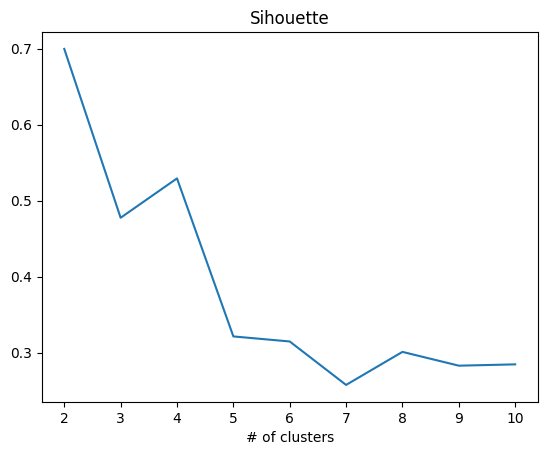

In [31]:
#librairie pour évaluation des partitions
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res= np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(min_df)
    res[k] = metrics.silhouette_score(min_df,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Sihouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()